In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
taxis = sns.load_dataset("taxis")
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [6]:
taxis.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


Text(0, 0.5, 'Distancia')

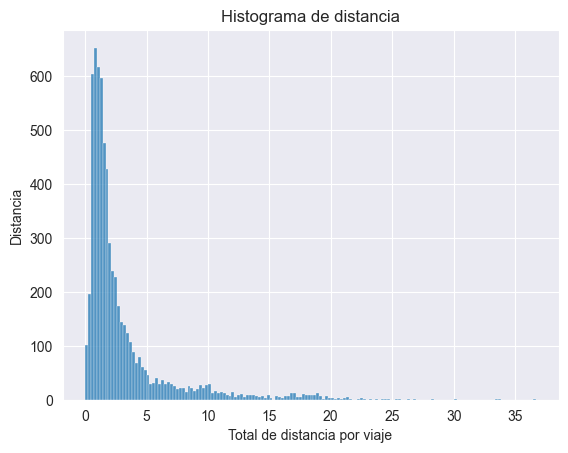

In [7]:
sns.set_style('darkgrid')
g = sns.histplot(data= taxis, x = 'distance')
# add label
g.set_title('Histograma de distancia')
g.set_xlabel('Total de distancia por viaje')
g.set_ylabel('Distancia')

Text(0.5, 0, 'Total pagado por viaje')

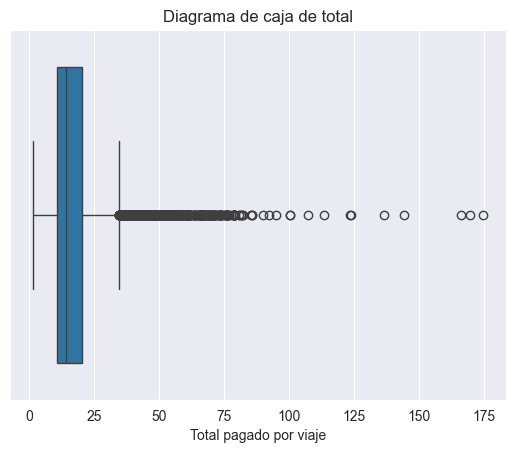

In [8]:
# diagrama de caja
t = sns.boxplot(data= taxis, x= 'total')

# Agregar titulo y cambiar el label x
t.set_title('Diagrama de caja de total')
t.set_xlabel('Total pagado por viaje')

In [10]:
# Z-escore
from scipy.stats import zscore
# calculate z-core for eaaach data point and commpute its absolute value
z_scores = zscore(taxis['total'])
abs_z_scores = np.abs(z_scores)

# Select the ouliers using a threshold of 3
outliers = taxis[abs_z_scores > 3 ]
outliers.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
56,2019-03-05 17:57:00,2019-03-05 18:45:25,2,19.59,52.0,0.00,5.76,65.56,yellow,credit card,JFK Airport,Upper East Side North,Queens,Manhattan
162,2019-03-06 17:36:48,2019-03-06 18:43:39,2,17.10,52.0,13.10,5.76,78.66,yellow,credit card,Midtown South,JFK Airport,Manhattan,Queens
188,2019-03-26 15:06:47,2019-03-26 15:59:52,1,18.41,52.0,0.02,5.76,61.08,yellow,credit card,JFK Airport,Midtown Center,Queens,Manhattan
225,2019-03-22 15:36:34,2019-03-22 16:34:48,2,12.07,48.5,11.51,5.76,69.07,yellow,credit card,Manhattan Valley,Boerum Hill,Manhattan,Brooklyn


In [11]:
print(f'Numero de outliers: {len(outliers)}')

Numero de outliers: 185


In [13]:
# import the median_abs_deviation function
from scipy.stats import median_abs_deviation
# calculate median absolute deviation
mad = median_abs_deviation(taxis['total'])
mad

4.199999999999999